In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline

In [7]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'Y dataset')

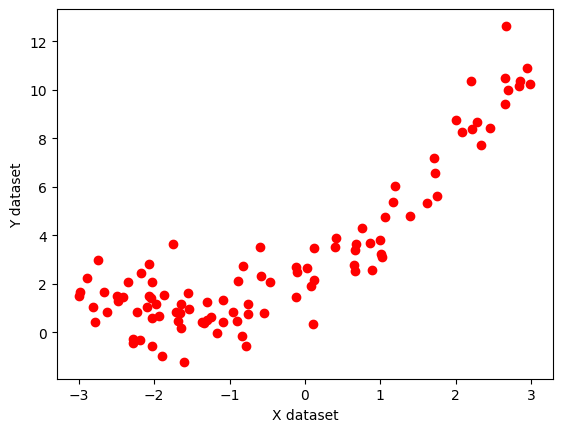

In [9]:
plt.scatter(X,y,color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
### Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
score = r2_score(y_test, lin_reg.predict(X_test))
print(f'R2 score for linear regression model is {score}')

R2 score for linear regression model is 0.7330222823480731


Text(0, 0.5, 'Y dataset')

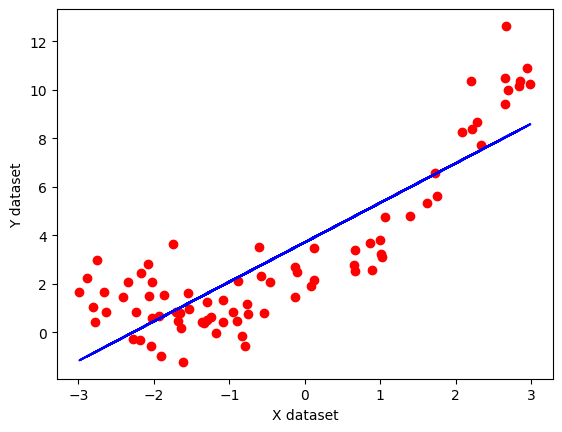

In [15]:
plt.plot(X_train, lin_reg.predict(X_train), color='b')
plt.scatter(X_train, y_train, color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [16]:
y_pred = lin_reg.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}') 
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 1.051839681440531
Mean Squared Error: 1.8116933583156232
Root Mean Squared Error: 1.3459915892440129


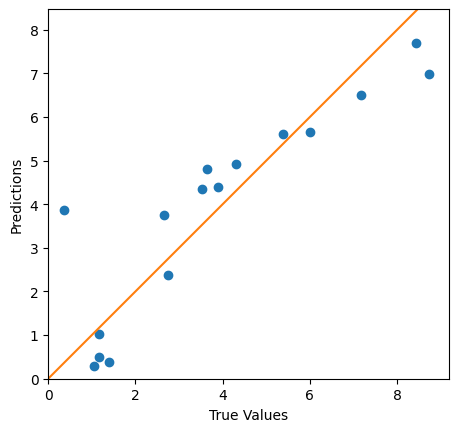

In [18]:
plt.plot(y_test, y_pred, 'o')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])
_ = plt.plot([-100, 100], [-100, 100])  
plt.show()

In [19]:
## Use Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [27]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_train)
y_poly_pred = reg_poly.predict(X_poly_test)
print(f'R2 score for polynomial regression model is {r2_score(y_test, y_poly_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_poly_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_poly_pred)}') 
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_poly_pred))}')

R2 score for polynomial regression model is 0.8630783503695779
Mean Absolute Error: 0.8044026898382297
Mean Squared Error: 0.9291413733953021
Root Mean Squared Error: 0.9639197961424498


In [23]:
## Increase the degree of polynomial features
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_poly3 = poly_features.fit_transform(X_train)
X_poly3_test = poly_features.transform(X_test)

In [24]:
reg_poly3 = LinearRegression()
reg_poly3.fit(X_poly3, y_train)
y_poly3_pred = reg_poly3.predict(X_poly3_test)
print(f'R2 score for polynomial regression model with degree 3 is {r2_score(y_test, y_poly3_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_poly3_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_poly3_pred)}') 
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_poly3_pred))}')  

R2 score for polynomial regression model with degree 3 is 0.8611354944534277
Mean Absolute Error: 0.8097975767669284
Mean Squared Error: 0.942325466773621
Root Mean Squared Error: 0.9707344986007352


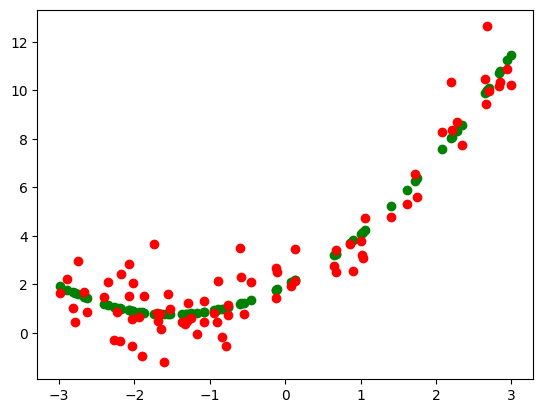

In [32]:
plt.scatter(X_train,reg_poly.predict(X_poly),color='g')
plt.scatter(X_train,y_train,color='r')

In [42]:
# Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

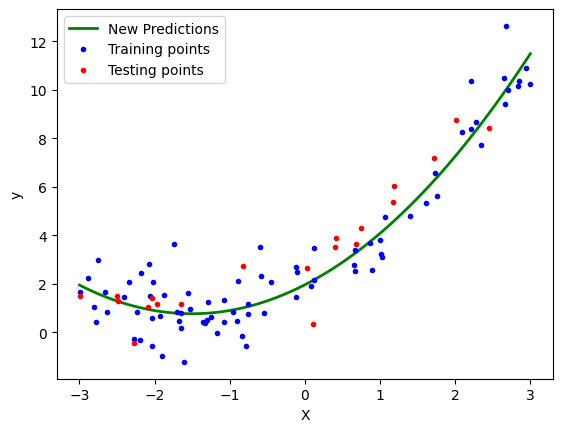

In [48]:
# Use the degree-2 poly_features for reg_poly predictions
X_new_poly = PolynomialFeatures(degree=2, include_bias=True).fit(X_train).transform(X_new)
y_new = reg_poly.predict(X_new_poly)
plt.plot(X_new, y_new, "g-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "r.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(X, y, degree=2):

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit the model
    reg_poly = LinearRegression()
    reg_poly.fit(X_poly, y_train)

    # Predict
    y_poly_pred = reg_poly.predict(X_poly_test)

    # Evaluate
    print(f'R2 score for polynomial regression model of degree {degree} is {r2_score(y_test, y_poly_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_poly_pred)}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_poly_pred)}') 
    print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_poly_pred))}')

    # Plotting
    plt.scatter(X_train, reg_poly.predict(X_poly), color='g', label='Predictions')
    plt.scatter(X_train, y_train, color='r', label='Training data')
    plt.xlabel('X dataset')
    plt.ylabel('Y dataset')
    plt.legend()
    plt.show()